In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [5]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
#gives the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#checks for any Null value
df.isnull().any()

area_type       False
availability    False
location         True
size             True
society          True
total_sqft      False
bath             True
balcony          True
price           False
dtype: bool

In [9]:
#Investigate the null value columns

In [8]:
df[df['location'].isna()==1]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [9]:
df[df['size'].isna()==1]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [10]:
df[df['society'].isna()==1]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00


In [11]:
df[df['bath'].isna()==1]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.000
11569,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.000
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000


In [12]:
df[df['balcony'].isna()==1]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,Kantsce,1925,3.0,NaN,125.00
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,Gentson,1296,2.0,NaN,81.00
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,NaN,1400,7.0,NaN,218.00
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,NaN,1200,5.0,NaN,130.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13


In [ ]:
#check for duplicates

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13315    False
13316    False
13317    False
13318    False
13319     True
Length: 13320, dtype: bool

In [14]:
df.duplicated().sum()

529

In [ ]:
#The above instance implies that we have 529 duplicate values

In [15]:
df=df.drop_duplicates()
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [16]:
df.duplicated().sum()

0

In [ ]:
#Now all the duplicates are removed

In [ ]:
#Now we'll start to adjust the data-bits one by one like the size can just be named as BHK and only the numeric part is stored

In [17]:
df['size'].str.split(' ').str[0]

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13316    4
13317    2
13318    4
Name: size, Length: 12791, dtype: object

In [ ]:
#Now we'll make a new column and store this and drop the size column

In [18]:
df['BHK'] = df['size'].str.split(' ').str[0]
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2


In [19]:
#Now drop the size column
df=df.drop(['size'], axis=1)
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2


In [20]:
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2


In [ ]:
#Fix the datatypes

In [21]:
df.dtypes

area_type        object
availability     object
location         object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
BHK              object
dtype: object

In [22]:
df['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', nan, '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [23]:
#First remove Nan
df['BHK'].fillna(0)

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13316    4
13317    2
13318    4
Name: BHK, Length: 12791, dtype: object

In [24]:
df['BHK']=df['BHK'].fillna(0)
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


In [25]:
#Check if Nan Value still remains
(df['BHK'].isna()==1).unique()

array([False])

In [26]:
#Convert the BHK to integer
df['BHK'].astype(int)

0        2
1        4
2        3
3        3
4        2
        ..
13314    3
13315    5
13316    4
13317    2
13318    4
Name: BHK, Length: 12791, dtype: int32

In [27]:
df['BHK']=df['BHK'].astype(int)
df.head(2)

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4


In [28]:
df.dtypes

area_type        object
availability     object
location         object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
BHK               int32
dtype: object

In [29]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [30]:
df.isnull().any()

area_type       False
availability    False
location         True
society          True
total_sqft      False
bath             True
balcony          True
price           False
BHK             False
dtype: bool

In [ ]:
#Now mark balcony and bath nan values as 0

In [31]:
df['bath'][df['bath'].isna()].tolist()

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [32]:
df['bath'].fillna(0)

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13314    3.0
13315    4.0
13316    5.0
13317    2.0
13318    4.0
Name: bath, Length: 12791, dtype: float64

In [33]:
df['bath']=df['bath'].fillna(0)
df

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715,3.0,3.0,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141,2.0,1.0,60.00,2


In [34]:
df['bath'].astype(int)

0        2
1        5
2        2
3        3
4        2
        ..
13314    3
13315    4
13316    5
13317    2
13318    4
Name: bath, Length: 12791, dtype: int32

In [35]:
df['bath']=df['bath'].astype(int)
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2,1.0,51.00,2


In [36]:
#Repeat the same for balcony
df['balcony'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
13314    False
13315    False
13316     True
13317    False
13318    False
Name: balcony, Length: 12791, dtype: bool

In [37]:
df['balcony'].fillna(0)

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13314    3.0
13315    0.0
13316    0.0
13317    1.0
13318    1.0
Name: balcony, Length: 12791, dtype: float64

In [38]:
df['balcony']=df['balcony'].fillna(0)

In [39]:
df['balcony']=df['balcony'].astype(int)
df.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2,1,51.00,2


In [40]:
df.dtypes

area_type        object
availability     object
location         object
society          object
total_sqft       object
bath              int32
balcony           int32
price           float64
BHK               int32
dtype: object

In [41]:
#Now the 'total_sqft' is in object which we'll have to convert to integer
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [42]:
df.isnull().sum()

area_type          0
availability       0
location           1
society         5328
total_sqft         0
bath               0
balcony            0
price              0
BHK                0
dtype: int64

In [43]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [44]:
#since the 'total_sqft' is object type we can't directly convert, we'll have find all the range values and work accordingly
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [45]:
# '~' will give all the false values
df[~df['total_sqft'].apply(isfloat)].head(10)

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,LedorSa,2100 - 2850,4,0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,BrereAt,3010 - 3410,0,0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,Gollela,2957 - 3450,0,0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,SNontle,3067 - 8156,4,0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,Vaarech,1042 - 1105,2,0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,Kinuerg,1145 - 1340,2,0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,MCvarar,1015 - 1540,2,0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,Jurdsig,1520 - 1740,0,0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,NaN,34.46Sq. Meter,1,0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,Shxorm,1195 - 1440,2,0,63.770,2


In [74]:
#we can see different variations of values and will have to work accordingly to solve it
# 1) we'll create a function to give average value for the range of sqft

def range_to_float(x):
    token=x.split('-')
    if token==2:
        return (float(x[0])+float(x[1]))/2
    try: 
        return float(x)
    except: 
        return None

In [96]:
df['total_sqft']=df['total_sqft'].apply(range_to_float)

In [97]:
df['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [98]:
df[~df['total_sqft'].apply(isfloat)]

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12775 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12775 non-null  object 
 1   availability  12775 non-null  object 
 2   location      12774 non-null  object 
 3   society       7450 non-null   object 
 4   total_sqft    12537 non-null  float64
 5   bath          12775 non-null  int32  
 6   balcony       12775 non-null  int32  
 7   price         12775 non-null  float64
 8   BHK           12775 non-null  int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 848.3+ KB


In [100]:
df['total_sqft'].isnull().sum()

238

In [101]:
#Now there are 246 flats which do not have sqft mentioned so we can drop them
df = df.dropna(subset=['total_sqft'])

In [102]:
df['total_sqft'].isnull().sum()

0

In [103]:
df[df['BHK']==0]

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK


In [104]:
#A house can't have have 0BHK as a value so we'll drop that too

In [105]:
df = df[df['BHK'] != 0]

In [106]:
df[df['BHK']==0]

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK


In [107]:
#Now we'll check if any price is '0'
df['price'].isnull().unique()

array([False])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12537 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12537 non-null  object 
 1   availability  12537 non-null  object 
 2   location      12536 non-null  object 
 3   society       7242 non-null   object 
 4   total_sqft    12537 non-null  float64
 5   bath          12537 non-null  int32  
 6   balcony       12537 non-null  int32  
 7   price         12537 non-null  float64
 8   BHK           12537 non-null  int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 832.5+ KB


In [179]:
df11=df.copy()
df11

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2,1,51.00,2
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,SoosePr,1715.0,3,3,112.00,3
13315,Built-up Area,Ready To Move,Whitefield,ArsiaEx,3453.0,4,0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,NaN,3600.0,5,0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,Mahla T,1141.0,2,1,60.00,2


In [180]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12537 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12537 non-null  object 
 1   availability  12537 non-null  object 
 2   location      12536 non-null  object 
 3   society       7242 non-null   object 
 4   total_sqft    12537 non-null  float64
 5   bath          12537 non-null  int32  
 6   balcony       12537 non-null  int32  
 7   price         12537 non-null  float64
 8   BHK           12537 non-null  int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 832.5+ KB


In [183]:
df11=df11.drop(columns = ['society'])
df11.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2,1,51.00,2


In [185]:
df11['bath'].isnull().sum()

0

In [186]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12537 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12537 non-null  object 
 1   availability  12537 non-null  object 
 2   location      12536 non-null  object 
 3   total_sqft    12537 non-null  float64
 4   bath          12537 non-null  int32  
 5   balcony       12537 non-null  int32  
 6   price         12537 non-null  float64
 7   BHK           12537 non-null  int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 734.6+ KB


In [189]:
df11=df11.dropna()

In [190]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12536 entries, 0 to 13318
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12536 non-null  object 
 1   availability  12536 non-null  object 
 2   location      12536 non-null  object 
 3   total_sqft    12536 non-null  float64
 4   bath          12536 non-null  int32  
 5   balcony       12536 non-null  int32  
 6   price         12536 non-null  float64
 7   BHK           12536 non-null  int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 734.5+ KB


In [193]:
df11.total_sqft=df11.total_sqft.astype(int)
df11.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2,1,51.00,2


In [207]:
df12 = df11.copy()
df12.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2,1,51.00,2


**Now we need to do feature engineering for Dimensionality Reduction**

In [208]:
df12['price_per_sqft'] = df12.price*100000/df12.total_sqft
df12.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2,1,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5,3,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2,3,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3,1,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2,1,51.00,2,4250.000000


**We'll reduce the Dimensionality based on Location**

In [209]:
len(df12.location.unique())

1298

In [210]:
df12.location = df12.location.apply(lambda x: x.strip())

location_stats = df12.groupby('location').location.agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               502
Sarjapur  Road           367
Electronic City          289
Kanakpura Road           240
Thanisandra              220
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [211]:
len(location_stats[location_stats<=10])

1056

In [212]:
location_stats_less=location_stats[location_stats<=10]
location_stats_less

location
1st Block Koramangala    10
Nagappa Reddy Layout     10
Sector 1 HSR Layout      10
Naganathapura            10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1056, dtype: int64

In [213]:
df12.location=df12.location.apply(lambda x: 'other' if x in location_stats_less else x)
len(df12['location'].unique())

232

In [214]:
df12.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2,1,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5,3,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2,3,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3,1,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2,1,51.00,2,4250.000000


**Now we will remove the outliers! There may be houses with less than 300 sqft area per BHK, in order to avoid conflicts we'll remove that!**

In [215]:
df12[df12.total_sqft/df12.BHK < 300].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Plot Area,Ready To Move,other,1020,6,0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600,9,0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407,4,1,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,1350,7,0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,500,3,2,100.0,3,20000.000000
78,Built-up Area,Ready To Move,Kaval Byrasandra,460,1,0,22.0,2,4782.608696
89,Plot Area,Ready To Move,Rajaji Nagar,710,6,3,160.0,6,22535.211268
119,Plot Area,Ready To Move,Hennur Road,276,3,3,23.0,2,8333.333333
129,Plot Area,Ready To Move,Vishwapriya Layout,950,7,0,115.0,7,12105.263158
149,Plot Area,Ready To Move,other,1034,5,0,185.0,6,17891.682785


In [216]:
df12.shape

(12536, 9)

In [218]:
df13=df12[~(df12.total_sqft/df12.BHK < 300)]
df13.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2,1,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5,3,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440,2,3,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3,1,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200,2,1,51.00,2,4250.000000


In [219]:
df13.shape

(11802, 9)

In [220]:
df13.price_per_sqft.describe()

count     11802.000000
mean       6384.695055
std        4251.930532
min         267.829813
25%        4250.000000
50%        5339.805825
75%        6988.636364
max      176470.588235
Name: price_per_sqft, dtype: float64

**Now we'll remove all the instance where price is more than (mean + std) and less than (mean - std)**

In [221]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df14 = remove_pps_outlier(df13)
df14.shape

(9739, 9)

In [222]:
df14

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850,4,1,428.00,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630,3,2,194.00,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2,3,235.00,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200,2,0,130.00,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235,2,2,148.00,2,11983.805668
...,...,...,...,...,...,...,...,...,...
9734,Built-up Area,Ready To Move,other,1256,2,1,65.00,2,5175.159236
9735,Plot Area,18-Jan,other,812,1,0,26.00,1,3201.970443
9736,Super built-up Area,18-Jul,other,1440,2,2,63.93,3,4439.583333
9737,Super built-up Area,Ready To Move,other,1075,2,2,48.00,2,4465.116279


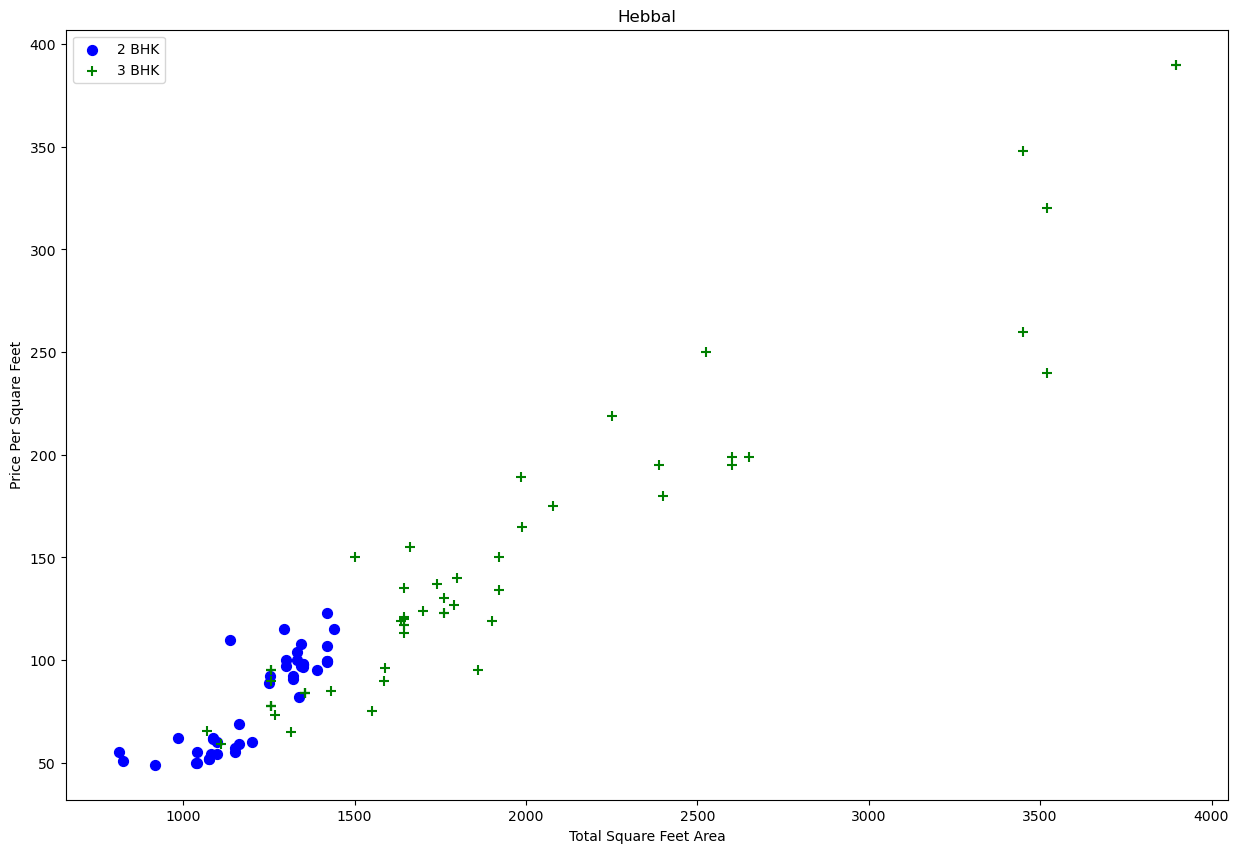

In [224]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df14, "Hebbal")

**We should also remove apartment where the price for the the 3BHK is less than 2BHK for the same location. What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

    {
        '1': {
            'mean': 4000,
            'std': 2000,
            'count': 34
        },
        '2': {
            'mean': 4300,
            'std': 2300,
            'count': 22
        },
    }
**Now we can remove those 2BHK apartments whose price_per_sqft is less than mean price _per_sqft of 1BHK apartment**

In [232]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean (bhk_df.price_per_sqft),
                'std': np.std (bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df [bhk_df.price_per_sqft<(stats['mean'])]. index. values)
    return df.drop(exclude_indices, axis='index')

In [233]:
df15 = remove_bhk_outliers(df14)
df15.shape

(6901, 9)

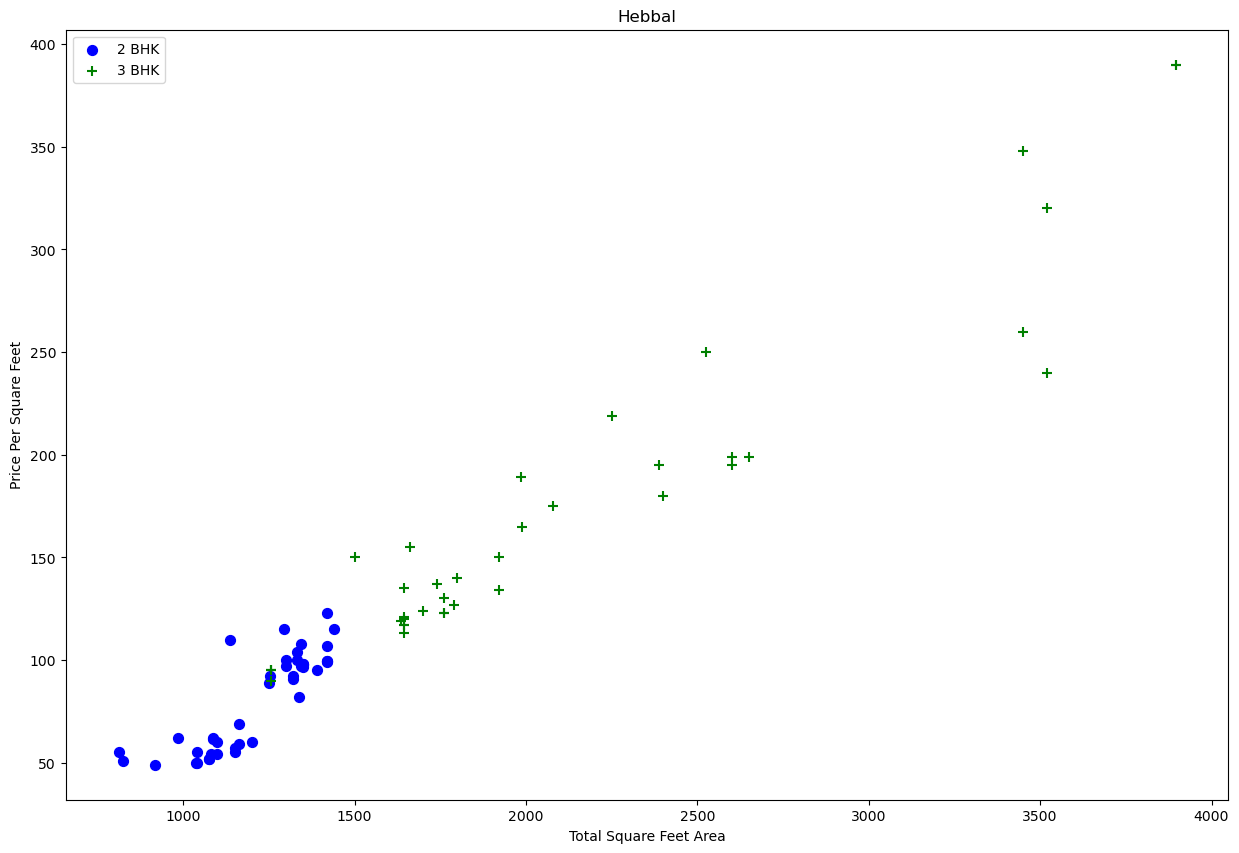

In [234]:
plot_scatter_chart(df15, "Hebbal")

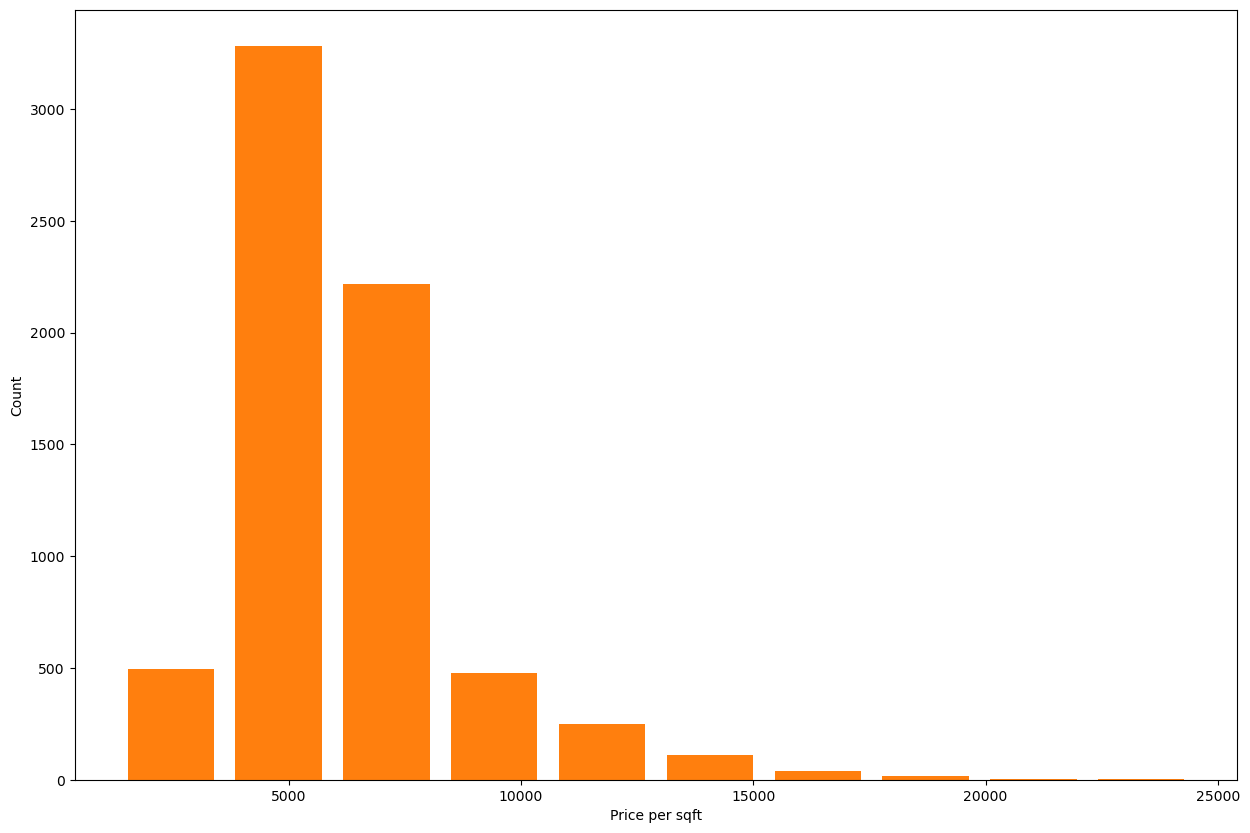

In [236]:
plt.hist(df15.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()

In [237]:
df15.bath.unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9,  0, 12, 16, 13])

In [238]:
df15[df15.bath>10]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
4938,Super built-up Area,Ready To Move,Neeladri Nagar,4000,12,0,160.0,10,4000.000000
7954,Super built-up Area,Ready To Move,other,12000,12,0,525.0,10,4375.000000
8048,Super built-up Area,Ready To Move,other,10000,16,0,550.0,16,5500.000000
8795,Super built-up Area,Ready To Move,other,6000,12,0,150.0,11,2500.000000
9135,Super built-up Area,Ready To Move,other,5425,13,0,275.0,13,5069.124424


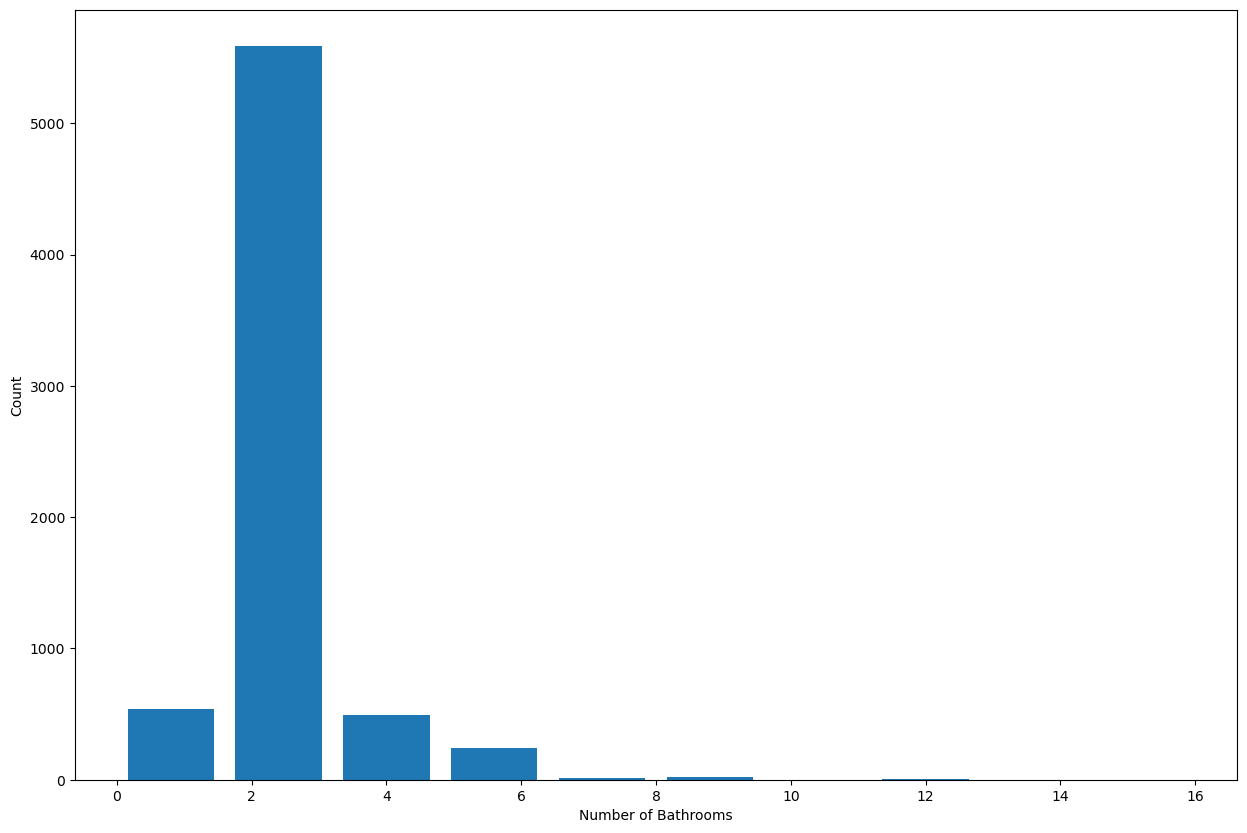

In [239]:
plt.hist(df15.bath, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

In [240]:
df15[df15.bath>df15.BHK+2]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1498,Built-up Area,Ready To Move,Chikkabanavar,2460,7,2,80.0,4,3252.032520
4907,Built-up Area,Ready To Move,Nagasandra,7000,8,0,450.0,4,6428.571429
6263,Super built-up Area,Ready To Move,Thanisandra,1806,6,2,116.0,3,6423.034330
7877,Super built-up Area,Ready To Move,other,11338,9,1,1000.0,6,8819.897689


In [242]:
df16 = df15[df15.bath<df15.BHK+2]
df16.shape

(6827, 9)

**Now we'll start building the model**

In [246]:
df20 = df16.drop(['price_per_sqft'], axis=1)
df20.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,20-May,1st Block Jayanagar,2850,4,1,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630,3,2,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2,3,235.0,3
3,Built-up Area,15-Dec,1st Block Jayanagar,1200,2,0,130.0,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235,2,2,148.0,2


In [322]:
df20.area_type = df20.area_type.apply(lambda x: x.strip())
df20.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,20-May,1st Block Jayanagar,2850,4,1,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630,3,2,194.0,3
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2,3,235.0,3
3,Built-up Area,15-Dec,1st Block Jayanagar,1200,2,0,130.0,3
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235,2,2,148.0,2


In [323]:
dummies1=pd.get_dummies(df20.location).astype(int)
dummies1.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
dummies2=pd.get_dummies(df20.area_type).astype(int)
dummies2.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1


In [325]:
df21 = pd.concat([df20, dummies1.drop(['other'], axis=1)], axis=1)
df21.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,20-May,1st Block Jayanagar,2850,4,1,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630,3,2,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2,3,235.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,15-Dec,1st Block Jayanagar,1200,2,0,130.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235,2,2,148.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
print(dummies2.columns)

Index(['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'], dtype='object')


In [327]:
df21 = pd.concat([df21, dummies2.drop(['Plot  Area'], axis=1)], axis=1)
df21.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,Super built-up Area,20-May,1st Block Jayanagar,2850,4,1,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630,3,2,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875,2,3,235.0,3,1,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,15-Dec,1st Block Jayanagar,1200,2,0,130.0,3,1,0,...,0,0,0,0,0,0,0,1,0,0
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235,2,2,148.0,2,1,0,...,0,0,0,0,0,0,0,0,0,1


In [330]:
df22=df21.drop(["area_type", "location"], axis=1)
df22.head(3)

,availability,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,20-May,2850,4,1,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,18-Jun,1630,3,2,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Ready To Move,1875,2,3,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [335]:
df22.availability = df22.availability.apply(lambda x: 1 if x=="Ready To Move" else 0)

In [336]:
df22.head()

,availability,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,0,2850,4,1,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1630,3,2,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1875,2,3,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1200,2,0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1235,2,2,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [403]:
x = df22.drop(['price'], axis=1)
x.head(5)

,availability,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Super built-up Area
0,0,2850,4,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1630,3,2,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1875,2,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1200,2,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1235,2,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [404]:
y = df22.price
y

0       428.0
1       194.0
2       235.0
3       130.0
4       148.0
        ...  
9729     64.0
9731     70.0
9732    200.0
9735     26.0
9738    400.0
Name: price, Length: 6827, dtype: float64

In [405]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [406]:
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(x_train, y_train)
lnr.score(x_test, y_test)

0.8639703588173764

In [407]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.86397036, 0.81639003, 0.87547846, 0.86252076, 0.86412242])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                    'criterion': ['squared_error', 'friedman_mse'],
                    'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'criterion': ['squared_error', 'absolute_error'],
                'max_depth': [None, 10, 20]
            }
        }
    }
    scores = [ ]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

print(find_best_model_using_gridsearchcv(x,y));

In [438]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest MSE:", rf_mse)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           verbose=2,
                           n_jobs=-1)


grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

best_rf_predictions = best_rf_model.predict(x_test)
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
print("Tuned Random Forest MSE:", best_rf_mse)

print("Score: ", grid_search.best_score_)

Random Forest MSE: 1891.254605491895
Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [424]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                    'criterion': ['squared_error', 'friedman_mse'],
                    'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

print(find_best_model_using_gridsearchcv(x,y));

               model  best_score  \
0  linear_regression    0.856496   
1              lasso    0.715751   
2      decision_tree    0.697757   

                                         best_params  
0                            {'fit_intercept': True}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'squared_error', 'splitter': 'ra...  


In [449]:
import pandas as pd

def predict_price(area_type, location, availability, sqft, bath, balcony, bhk):

    loc_index_1 = np.where(x.columns == location)[0]
    loc_index_1 = loc_index_1[0] if len(loc_index_1) > 0 else -1

    loc_index_2 = np.where(x.columns == area_type)[0]
    loc_index_2 = loc_index_2[0] if len(loc_index_2) > 0 else -1

    z = np.zeros(len(x.columns))

    z[0] = availability
    z[1] = sqft
    z[2] = bath
    z[3] = balcony
    z[4] = bhk

    if loc_index_1 >= 0:
        z[loc_index_1] = 1
    if loc_index_2 >= 0:
        z[loc_index_2] = 1

    z_df = pd.DataFrame([z], columns=x.columns)

    return lnr.predict(z_df)[0]


In [454]:
predict_price("Super  built-up  Area", "1st Phase JP Nagar", 1, 2000, 2, 1, 2)

177.02077854826484

In [455]:
import pickle
with open('bangalore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lnr, f)